In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = 'VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

dict_keys(['sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_vxy_fromPV1', 'sel_vtx_vxy_fromPV10', 'sel_vtx_vxy_fromPV100', 'sel_vtx_vx1', 'sel_vtx_vx10', 'sel_vtx_vx100', 'sel_vtx_vy1', 'sel_vtx_vy10', 'sel_vtx_vy100', 'sel_vtx_vx_fromPV1', 'sel_vtx_vx_fromPV10', 'sel_vtx_vx_fromPV100', 'sel_vtx_vy_fromPV1', 'sel_vtx_vy_fromPV10', 'sel_vtx_vy_fromPV100', 'sel_vtx_CosThetaColl', 'sel_vtx_CosThetaColl_fromPV', 'sel_vtx_CosThetaColl_fromPV_refit', 'sel_vtx_vxy1_vs_CosThetaColl', 'sel_vtx_vxy10_vs_CosThetaColl', 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV', 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV', 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_refit', 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_refit', 'CosThetaColl_vs_CosThetaColl_fromPV', 'CosThetaColl_fromPV_vs_CosThetaColl_fromPV_refit', 'PVx', 'PVy', 'sel_vtx_sign', 'sel_vtx_sign_vs_sel_vtx_pt_ratio', 'sel_vtx_sign_vs_CosThetaColl_fromPV_refit', 'sel_vtx_pt_ratio', 'sel_vtx_pt_ratio_vs_CosThetaColl_fromPV_refit', 'lead_

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",...,Vtx cos_collinear_fromPV_refit > -0.99,Vtx cos_collinear_fromPV_refit > -0.98,Vtx cos_collinear_fromPV_refit > -0.97,Vtx cos_collinear_fromPV_refit > -0.96,Vtx cos_collinear_fromPV_refit > -0.95,Vtx cos_collinear_fromPV_refit > -0.9,Vtx cos_collinear_fromPV_refit > -0.85,Vtx cos_collinear_fromPV_refit > -0.8,Vtx cos_collinear_fromPV_refit > -0.75,Vtx cos_collinear_fromPV_refit > -0.7
SingleTop,0.00023564,0.00000294,0.00000263,0.00000263,0.00000249,0.00000095,0.00000088,0.00000085,0.00000083,0.00000041,...,0.00000012,0.00000012,0.00000010,0.00000010,0.00000010,0.00000008,0.00000007,0.00000006,0.00000006,0.00000006
ZGamma,0.00032470,0.00000347,0.00000366,0.00000366,0.00000343,0.00000181,0.00000164,0.00000164,0.00000164,0.00000121,...,0.00000020,0.00000020,0.00000020,0.00000020,0.00000020,0.00000020,0.00000020,0.00000020,0.00000020,0.00000020
DY-M4to50,0.00002646,0.00000039,0.00000038,0.00000038,0.00000035,0.00000019,0.00000019,0.00000019,0.00000019,0.00000009,...,0.00000001,0.00000001,0.00000001,0.00000001,0.00000001,0.00000001,0.00000001,0.00000001,0.00000001,0.00000001
ZJets,0.00242166,0.00002015,0.00001888,0.00001878,0.00001787,0.00001060,0.00001002,0.00000987,0.00000977,0.00000684,...,0.00000271,0.00000252,0.00000238,0.00000228,0.00000217,0.00000192,0.00000175,0.00000161,0.00000142,0.00000130
Multiboson,0.00065914,0.00000552,0.00000507,0.00000500,0.00000471,0.00000231,0.00000216,0.00000208,0.00000205,0.00000133,...,0.00000028,0.00000027,0.00000024,0.00000024,0.00000024,0.00000019,0.00000016,0.00000013,0.00000012,0.00000012
QCD,0.00000248,0.00000004,0.00000002,0.00000002,0.00000002,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
WJets,0.00101329,0.00000800,0.00000748,0.00000744,0.00000702,0.00000388,0.00000369,0.00000366,0.00000364,0.00000226,...,0.00000078,0.00000073,0.00000070,0.00000068,0.00000066,0.00000055,0.00000051,0.00000046,0.00000042,0.00000038
DY-M50,0.00039399,0.00000594,0.00000546,0.00000540,0.00000515,0.00000256,0.00000241,0.00000241,0.00000239,0.00000141,...,0.00000044,0.00000042,0.00000039,0.00000038,0.00000038,0.00000033,0.00000030,0.00000028,0.00000026,0.00000022
TTX,0.00136440,0.00003263,0.00003026,0.00002972,0.00002716,0.00000714,0.00000717,0.00000714,0.00000707,0.00000033,...,0.00000191,0.00000142,0.00000184,0.00000183,0.00000182,0.00000175,0.00000172,0.00000169,0.00000167,0.00000120
TTbar,0.00044365,0.00000962,0.00000893,0.00000888,0.00000849,0.00000304,0.00000286,0.00000282,0.00000280,0.00000175,...,0.00000060,0.00000055,0.00000053,0.00000050,0.00000049,0.00000042,0.00000037,0.00000033,0.00000030,0.00000026


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",...,Vtx cos_collinear_fromPV_refit > -0.99,Vtx cos_collinear_fromPV_refit > -0.98,Vtx cos_collinear_fromPV_refit > -0.97,Vtx cos_collinear_fromPV_refit > -0.96,Vtx cos_collinear_fromPV_refit > -0.95,Vtx cos_collinear_fromPV_refit > -0.9,Vtx cos_collinear_fromPV_refit > -0.85,Vtx cos_collinear_fromPV_refit > -0.8,Vtx cos_collinear_fromPV_refit > -0.75,Vtx cos_collinear_fromPV_refit > -0.7
SingleTop,"3,665.01",45.73,40.96,40.86,38.79,14.74,13.75,13.25,12.93,6.43,...,1.87,1.83,1.59,1.55,1.55,1.31,1.02,0.97,0.97,0.94
ZGamma,"1,665.25",17.78,18.75,18.75,17.58,9.27,8.41,8.41,8.41,6.19,...,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02
DY-M4to50,376.94,5.60,5.40,5.39,5.02,2.73,2.72,2.72,2.68,1.24,...,0.20,0.16,0.14,0.13,0.13,0.11,0.11,0.09,0.09,0.09
ZJets,"51,827.18",431.29,404.09,401.90,382.37,226.85,214.36,211.13,209.10,146.34,...,57.98,54.00,50.86,48.71,46.45,41.19,37.46,34.39,30.40,27.72
Multiboson,"4,593.86",38.45,35.35,34.83,32.84,16.12,15.08,14.50,14.28,9.25,...,1.95,1.90,1.65,1.65,1.65,1.34,1.13,0.92,0.86,0.86
QCD,"53,319.99",878.02,525.73,525.50,504.55,194.19,185.91,185.91,175.22,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
WJets,"177,451.75","1,401.44","1,310.17","1,302.53","1,230.00",679.52,646.11,641.67,637.38,395.85,...,137.02,127.98,122.13,118.27,116.35,97.07,88.71,80.43,73.28,66.58
DY-M50,"4,354.47",65.67,60.35,59.73,56.88,28.31,26.63,26.58,26.40,15.53,...,4.90,4.67,4.33,4.24,4.17,3.68,3.28,3.07,2.89,2.40
TTX,423.57,10.13,9.39,9.23,8.43,2.22,2.23,2.22,2.19,0.10,...,0.59,0.44,0.57,0.57,0.56,0.54,0.53,0.53,0.52,0.37
TTbar,"22,073.23",478.78,444.48,441.78,422.40,151.46,142.19,140.15,139.12,87.01,...,29.82,27.58,26.32,24.91,24.36,20.91,18.60,16.59,14.86,13.03


In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",...,Vtx cos_collinear_fromPV_refit > -0.99,Vtx cos_collinear_fromPV_refit > -0.98,Vtx cos_collinear_fromPV_refit > -0.97,Vtx cos_collinear_fromPV_refit > -0.96,Vtx cos_collinear_fromPV_refit > -0.95,Vtx cos_collinear_fromPV_refit > -0.9,Vtx cos_collinear_fromPV_refit > -0.85,Vtx cos_collinear_fromPV_refit > -0.8,Vtx cos_collinear_fromPV_refit > -0.75,Vtx cos_collinear_fromPV_refit > -0.7
SingleTop,46314,469,430,427,406,153,138,135,132,64,...,16,15,14,13,13,12,10,9,9,8
ZGamma,6511,92,88,88,84,43,39,39,39,21,...,4,4,4,4,4,4,4,4,4,4
DY-M4to50,25923,418,393,391,371,193,192,192,184,89,...,21,16,14,13,13,11,11,10,10,10
ZJets,729756,7752,7254,7212,6875,3958,3818,3805,3734,2222,...,829,760,716,687,656,572,517,468,422,381
Multiboson,24553,237,219,217,206,103,99,96,94,61,...,15,14,12,12,12,11,10,9,8,8
QCD,31603,242,232,231,217,69,68,68,62,0,...,0,0,0,0,0,0,0,0,0,0
WJets,1171204,10037,9440,9375,8872,4136,4029,4018,3892,1885,...,668,623,594,574,562,473,429,389,346,311
DY-M50,272468,4534,4236,4194,4011,1587,1557,1555,1504,708,...,232,217,199,189,183,156,128,119,106,93
TTX,141391,3028,2798,2775,2657,792,759,740,718,453,...,161,151,139,138,136,115,104,99,91,83
TTbar,519733,11111,10309,10246,9798,3505,3280,3228,3203,1995,...,685,635,606,572,557,475,423,378,339,298


In [12]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",...,Vtx cos_collinear_fromPV_refit > -0.99,Vtx cos_collinear_fromPV_refit > -0.98,Vtx cos_collinear_fromPV_refit > -0.97,Vtx cos_collinear_fromPV_refit > -0.96,Vtx cos_collinear_fromPV_refit > -0.95,Vtx cos_collinear_fromPV_refit > -0.9,Vtx cos_collinear_fromPV_refit > -0.85,Vtx cos_collinear_fromPV_refit > -0.8,Vtx cos_collinear_fromPV_refit > -0.75,Vtx cos_collinear_fromPV_refit > -0.7
SingleTop,46314,469,430,427,406,153,138,135,132,64,...,16,15,14,13,13,12,10,9,9,8
ZGamma,6511,92,88,88,84,43,39,39,39,21,...,4,4,4,4,4,4,4,4,4,4
DY-M4to50,25923,418,393,391,371,193,192,192,184,89,...,21,16,14,13,13,11,11,10,10,10
ZJets,729756,7752,7254,7212,6875,3958,3818,3805,3734,2222,...,829,760,716,687,656,572,517,468,422,381
Multiboson,24553,237,219,217,206,103,99,96,94,61,...,15,14,12,12,12,11,10,9,8,8
QCD,31603,242,232,231,217,69,68,68,62,0,...,0,0,0,0,0,0,0,0,0,0
WJets,1171204,10037,9440,9375,8872,4136,4029,4018,3892,1885,...,668,623,594,574,562,473,429,389,346,311
DY-M50,272468,4534,4236,4194,4011,1587,1557,1555,1504,708,...,232,217,199,189,183,156,128,119,106,93
TTX,141391,3028,2798,2775,2657,792,759,740,718,453,...,161,151,139,138,136,115,104,99,91,83
TTbar,519733,11111,10309,10246,9798,3505,3280,3228,3203,1995,...,685,635,606,572,557,475,423,378,339,298


In [13]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [14]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 113.02


In [15]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,SingleTop,ZGamma,DY-M4to50,ZJets,Multiboson,QCD,WJets,DY-M50,TTX,TTbar,Total
Weighted Counts,0.94,1.02,0.09,27.72,0.86,0.00,66.58,2.40,0.37,13.03,113.02
Raw Counts,8.00,4.00,10.00,381.00,8.00,0.00,311.00,93.00,83.00,298.00,"1,196.00"


## Data

In [16]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",...,Vtx cos_collinear_fromPV_refit > -0.99,Vtx cos_collinear_fromPV_refit > -0.98,Vtx cos_collinear_fromPV_refit > -0.97,Vtx cos_collinear_fromPV_refit > -0.96,Vtx cos_collinear_fromPV_refit > -0.95,Vtx cos_collinear_fromPV_refit > -0.9,Vtx cos_collinear_fromPV_refit > -0.85,Vtx cos_collinear_fromPV_refit > -0.8,Vtx cos_collinear_fromPV_refit > -0.75,Vtx cos_collinear_fromPV_refit > -0.7
data_2018_Data_MET_UL18_MET_Run2018D,"364,387.0","4,359.0","3,650.0","3,626.0","3,020.0","1,157.0",983.0,976.0,962.0,526.0,...,185.0,168.0,158.0,148.0,145.0,117.0,101.0,87.0,82.0,76.0
data_2018_Data_MET_UL18_MET_Run2018C,"82,311.0",944.0,803.0,800.0,677.0,252.0,213.0,212.0,208.0,113.0,...,41.0,39.0,39.0,38.0,37.0,34.0,26.0,24.0,23.0,20.0
data_2018_Data_MET_UL18_MET_Run2018B,"63,815.0",622.0,575.0,571.0,540.0,215.0,171.0,170.0,167.0,96.0,...,37.0,34.0,32.0,32.0,30.0,27.0,22.0,20.0,19.0,15.0
data_2018_Data_MET_UL18_MET_Run2018A,"124,602.0","1,320.0","1,217.0","1,209.0","1,149.0",397.0,330.0,329.0,324.0,184.0,...,71.0,65.0,62.0,60.0,60.0,53.0,46.0,44.0,38.0,33.0
Total,"635,115.0","7,245.0","6,245.0","6,206.0","5,386.0","2,021.0","1,697.0","1,687.0","1,661.0",919.0,...,334.0,306.0,291.0,278.0,272.0,231.0,195.0,175.0,162.0,144.0


In [17]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df[data_cts_df.columns.values[-1]]).transpose()

data_composition = data_composition.rename(index={data_cts_df.columns.values[-1]: 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,33.0,15.0,20.0,76.0,144.0


In [18]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                                         2.0
n(good vertex) > 0                                    2.1
HEM Jet Veto (eta upper bound bug)                    2.2
HEM Jet Veto (additionally veto missing eta region)   2.2
HEM electron Veto                                     2.0
No b-tagged jets                                      1.5
Leading jet |eta| < 2.4                               1.3
Leading jet pT > 80 GeV                               1.4
dPhi(MET,leading jet) > 1.5                           1.4
dPhi(MET,all jets) > 0.75                             1.4
Vtx cos_collinear_fromPV_refit < 0                    1.5
Vtx cos_collinear_fromPV_refit > -0.99                1.4
Vtx cos_collinear_fromPV_refit > -0.98                1.4
Vtx cos_collinear_fromPV_refit > -0.97                1.4
Vtx cos_collinear_fromPV_refit > -0.96                1.4
Vtx cos_collinear_fromPV_refit > -0.95                1.4
Vtx cos_collinear_fromPV_refit > -0.9                 1.4
Vtx cos_collin

In [19]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                      7,245.0
HEM Jet Veto (eta upper bound bug)                      6,245.0
HEM Jet Veto (additionally veto missing eta region)     6,206.0
HEM electron Veto                                       5,386.0
No b-tagged jets                                        2,021.0
Leading jet |eta| < 2.4                                 1,697.0
Leading jet pT > 80 GeV                                 1,687.0
dPhi(MET,leading jet) > 1.5                             1,661.0
dPhi(MET,all jets) > 0.75                                 919.0
Vtx cos_collinear_fromPV_refit < 0                        449.0
Vtx cos_collinear_fromPV_refit > -0.99                    334.0
Vtx cos_collinear_fromPV_refit > -0.98                    306.0
Vtx cos_collinear_fromPV_refit > -0.97                    291.0
Vtx cos_collinear_fromPV_refit > -0.96                    278.0
Vtx cos_collinear_fromPV_refit > -0.95  

In [20]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                                         319,751.2
n(good vertex) > 0                                      3,372.9
HEM Jet Veto (eta upper bound bug)                      2,854.7
HEM Jet Veto (additionally veto missing eta region)     2,840.5
HEM electron Veto                                       2,698.9
No b-tagged jets                                        1,325.4
Leading jet |eta| < 2.4                                 1,257.4
Leading jet pT > 80 GeV                                 1,246.5
dPhi(MET,leading jet) > 1.5                             1,227.7
dPhi(MET,all jets) > 0.75                                 667.9
Vtx cos_collinear_fromPV_refit < 0                        301.9
Vtx cos_collinear_fromPV_refit > -0.99                    235.4
Vtx cos_collinear_fromPV_refit > -0.98                    219.6
Vtx cos_collinear_fromPV_refit > -0.97                    208.6
Vtx cos_collinear_fromPV_refit > -0.96                    201.0
Vtx cos_collinear_fromPV_refit > -0.95  

/tmp/ipykernel_676453/1904301384.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


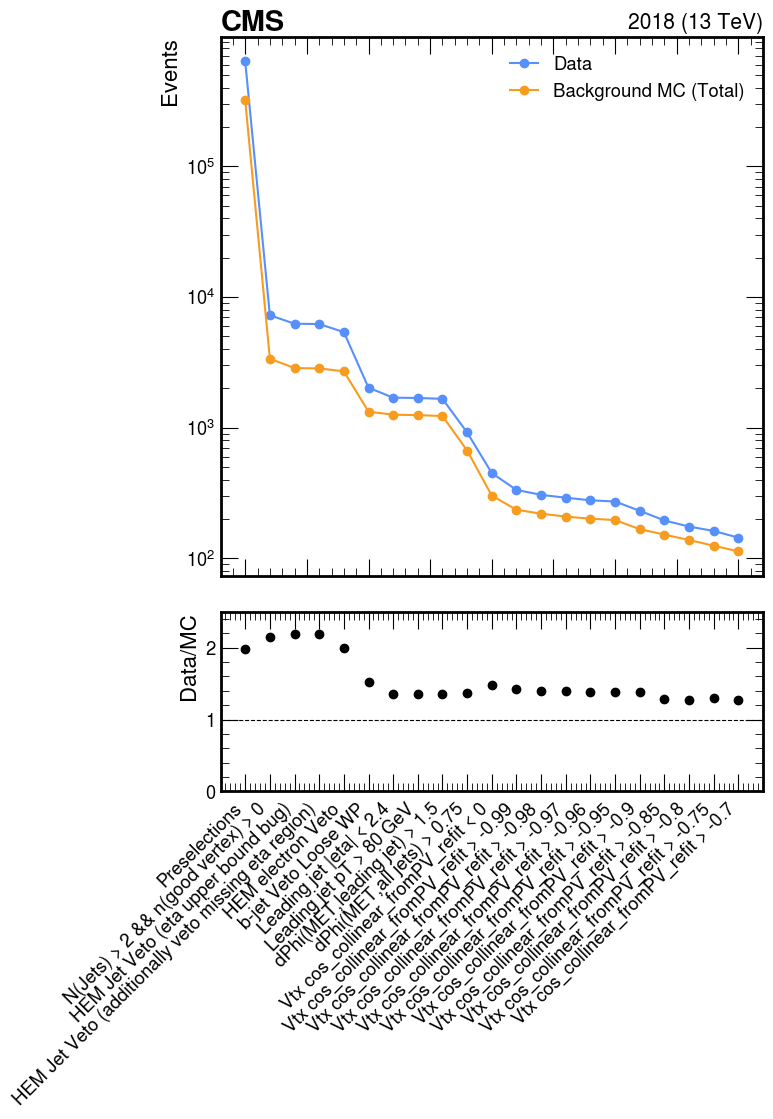

In [21]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11/cutflow//Cutflow_background.png


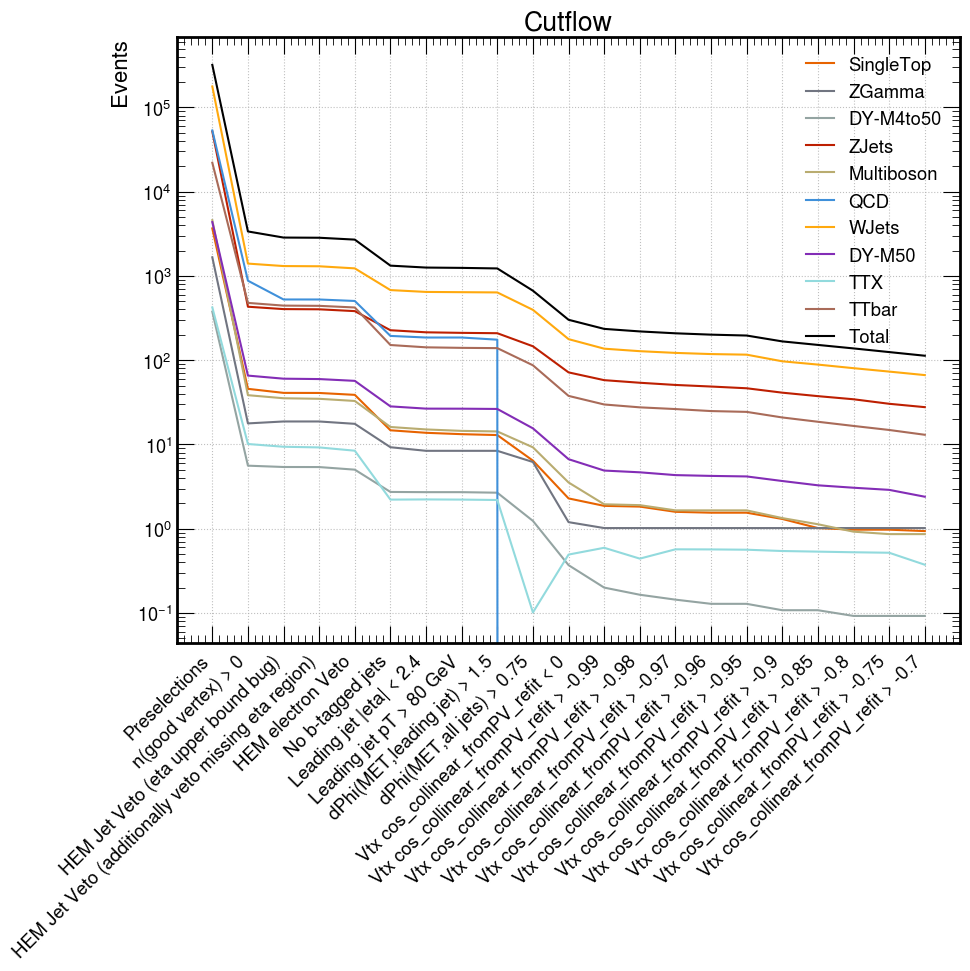

In [22]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [23]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                      7,245.0
HEM Jet Veto (eta upper bound bug)                      6,245.0
HEM Jet Veto (additionally veto missing eta region)     6,206.0
HEM electron Veto                                       5,386.0
No b-tagged jets                                        2,021.0
Leading jet |eta| < 2.4                                 1,697.0
Leading jet pT > 80 GeV                                 1,687.0
dPhi(MET,leading jet) > 1.5                             1,661.0
dPhi(MET,all jets) > 0.75                                 919.0
Vtx cos_collinear_fromPV_refit < 0                        449.0
Vtx cos_collinear_fromPV_refit > -0.99                    334.0
Vtx cos_collinear_fromPV_refit > -0.98                    306.0
Vtx cos_collinear_fromPV_refit > -0.97                    291.0
Vtx cos_collinear_fromPV_refit > -0.96                    278.0
Vtx cos_collinear_fromPV_refit > -0.95  

In [24]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",...,Vtx cos_collinear_fromPV_refit > -0.99,Vtx cos_collinear_fromPV_refit > -0.98,Vtx cos_collinear_fromPV_refit > -0.97,Vtx cos_collinear_fromPV_refit > -0.96,Vtx cos_collinear_fromPV_refit > -0.95,Vtx cos_collinear_fromPV_refit > -0.9,Vtx cos_collinear_fromPV_refit > -0.85,Vtx cos_collinear_fromPV_refit > -0.8,Vtx cos_collinear_fromPV_refit > -0.75,Vtx cos_collinear_fromPV_refit > -0.7
SingleTop,"3,665.0",45.7,41.0,40.9,38.8,14.7,13.8,13.2,12.9,6.4,...,1.9,1.8,1.6,1.6,1.6,1.3,1.0,1.0,1.0,0.9
ZGamma,"1,665.3",17.8,18.7,18.7,17.6,9.3,8.4,8.4,8.4,6.2,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DY-M4to50,376.9,5.6,5.4,5.4,5.0,2.7,2.7,2.7,2.7,1.2,...,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
ZJets,"51,827.2",431.3,404.1,401.9,382.4,226.8,214.4,211.1,209.1,146.3,...,58.0,54.0,50.9,48.7,46.5,41.2,37.5,34.4,30.4,27.7
Multiboson,"4,593.9",38.5,35.4,34.8,32.8,16.1,15.1,14.5,14.3,9.2,...,2.0,1.9,1.7,1.7,1.7,1.3,1.1,0.9,0.9,0.9
QCD,"53,320.0",878.0,525.7,525.5,504.6,194.2,185.9,185.9,175.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WJets,"177,451.8","1,401.4","1,310.2","1,302.5","1,230.0",679.5,646.1,641.7,637.4,395.9,...,137.0,128.0,122.1,118.3,116.4,97.1,88.7,80.4,73.3,66.6
DY-M50,"4,354.5",65.7,60.4,59.7,56.9,28.3,26.6,26.6,26.4,15.5,...,4.9,4.7,4.3,4.2,4.2,3.7,3.3,3.1,2.9,2.4
TTX,423.6,10.1,9.4,9.2,8.4,2.2,2.2,2.2,2.2,0.1,...,0.6,0.4,0.6,0.6,0.6,0.5,0.5,0.5,0.5,0.4
TTbar,"22,073.2",478.8,444.5,441.8,422.4,151.5,142.2,140.1,139.1,87.0,...,29.8,27.6,26.3,24.9,24.4,20.9,18.6,16.6,14.9,13.0


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11/cutflow//Cutflow_background.png


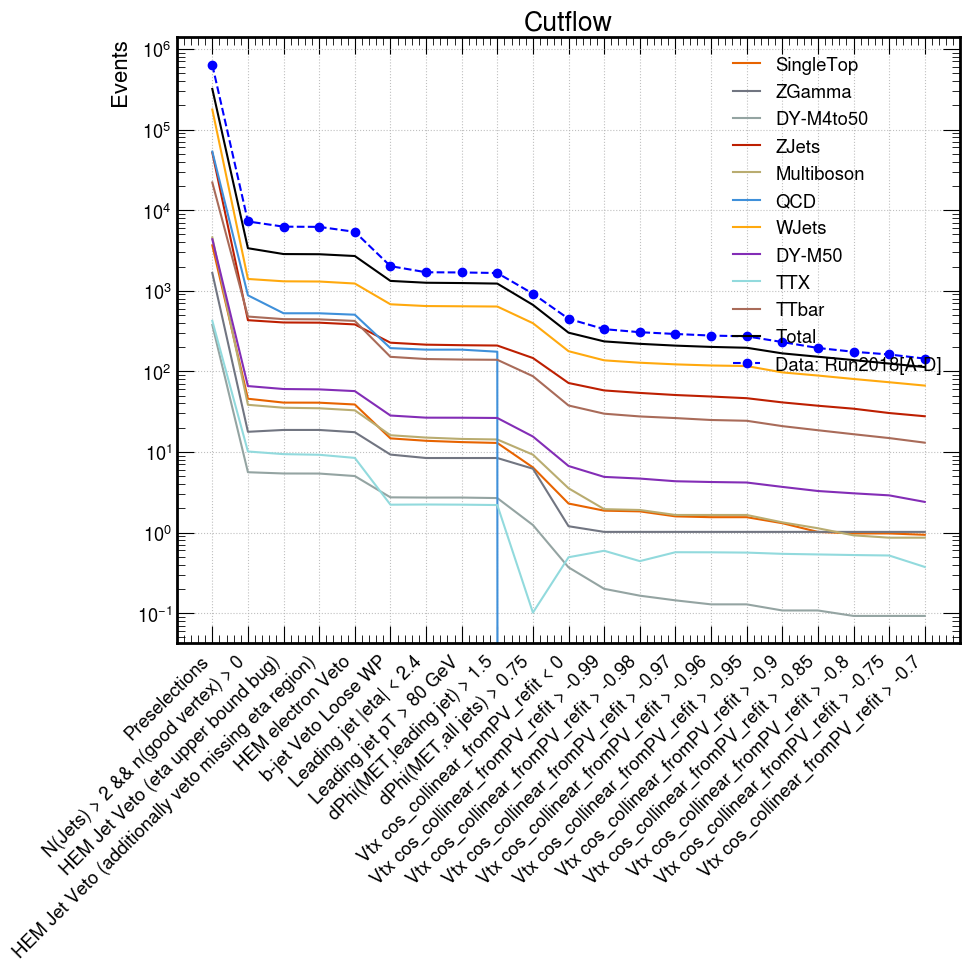

In [25]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()